In [1]:
import numpy as np
from classy_decays import Class

lcdm = Class()
lcdm.set({
    'output': 'mPk',
    'non linear': 'none',
    'P_k_max_1/Mpc' : 150,
})
lcdm.compute()
ks = np.logspace(-3, 2, 1000)

pars_common = {
    'M_dcdm': 1,
    'N_ncdm': 1,
    'background_ncdm_distribution': '1',
    'm_ncdm': '0',
    'Quadrature strategy': '4',
    'Number of momentum bins perturbs': '300',
    
    'evolver': 0,
    'l_max_ncdm': 17,
    'ncdm_fluid_approximation': 2,
    'ncdm_fluid_trigger_tau_over_tau_k': 25,
    'massive_daughter_perturbations': 'yes',
    'dark_radiation_perturbations': 'yes',

    'output': 'mPk',
    'non linear': 'none',
    'P_k_max_1/Mpc' : ks[-1],
}

gs = [0.005, 0.01, 0.05]
es = [0.001, 0.005, 0.01]
fs = [0.1, 0.5, 1]
fs_real = [0.1, 0.5, 0.999999999]
pks_g = []
pks_e = []
pks_f = []

for g in gs:
    pdm = Class()
    Omega_dm = lcdm.Omega_m() - lcdm.Omega_b()
    f_ddm_ini = 0.5
    epsilon = 0.005
    pdm.set(pars_common)
    pdm.set({
        'Omega_ini_dcdm2': Omega_dm * f_ddm_ini,
        'Omega_cdm': Omega_dm * (1-f_ddm_ini),
        'Gamma_dcdm': g * 977.792,
        'epsilon_dcdm': epsilon,
    })
    pdm.compute()
    pks_g.append(np.vectorize(pdm.pk_lin)(ks * lcdm.h(), 0) / np.vectorize(lcdm.pk_lin)(ks * lcdm.h(), 0))
print("$\Gamma$!")

for e in es:
    pdm = Class()
    omega_dm = (lcdm.Omega_m() - lcdm.Omega_b()) * lcdm.h()**2
    f_ddm_ini = 0.5
    Gamma = 0.01
    pdm.set(pars_common)
    pdm.set({
        'Omega_ini_dcdm2': Omega_dm * f_ddm_ini,
        'Omega_cdm': Omega_dm * (1-f_ddm_ini),
        'Gamma_dcdm': Gamma * 977.792,
        'epsilon_dcdm': e,
    })
    pdm.compute()
    pks_e.append(np.vectorize(pdm.pk_lin)(ks * lcdm.h(), 0) / np.vectorize(lcdm.pk_lin)(ks * lcdm.h(), 0))
print("$\varepsilon$!")

for f in fs_real:
    pdm = Class()
    omega_dm = (lcdm.Omega_m() - lcdm.Omega_b()) * lcdm.h()**2
    epsilon = 0.005
    Gamma = 0.01
    pdm.set(pars_common)
    pdm.set({
        'Omega_ini_dcdm2': Omega_dm * f,
        'Omega_cdm': Omega_dm * (1-f),
        'Gamma_dcdm': Gamma * 977.792,
        'epsilon_dcdm': epsilon,
    })
    pdm.compute()
    pks_f.append(np.vectorize(pdm.pk_lin)(ks * lcdm.h(), 0) / np.vectorize(lcdm.pk_lin)(ks * lcdm.h(), 0))
print("$f$!")

$\Gamma$!
$arepsilon$!
$f$!


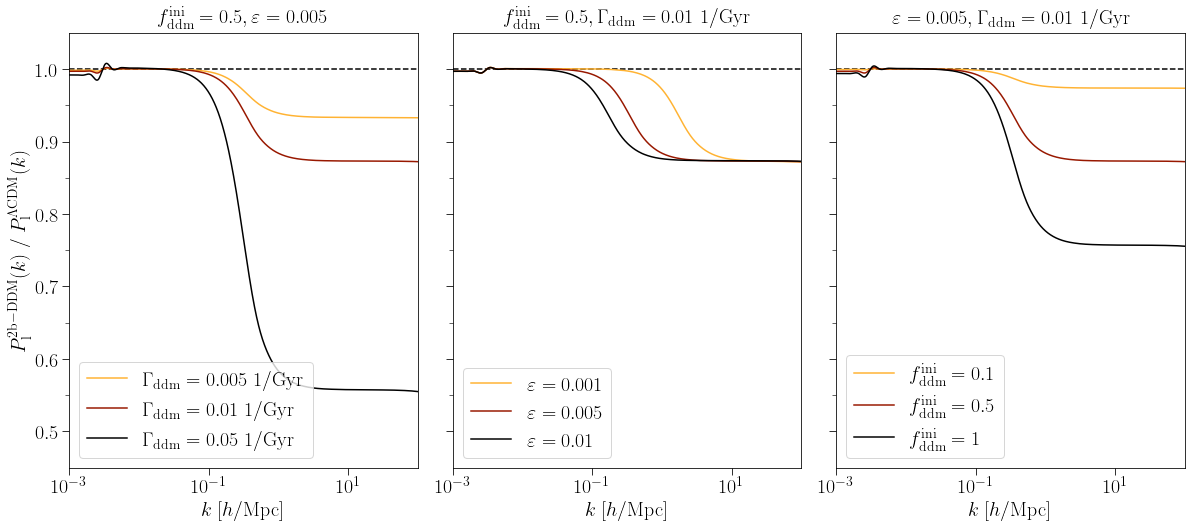

In [10]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pl

mpl.rcParams['text.usetex'] = True


fontsize = 20
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(8)
fig.set_figwidth (20)


ax1.set_title(r"$f_\mathrm{ddm}^\mathrm{ini}=0.5, \varepsilon=0.005$", fontsize=fontsize, pad=10)
ax1.set_ylabel(r"$P_\mathrm{l}^\mathrm{2b-DDM}(k)\;/\;P_\mathrm{l}^{\Lambda\mathrm{CDM}}(k)$", fontsize=fontsize)
ax1.set_xlabel(r"$k\; [h\mathrm{/Mpc}]$", fontsize=fontsize)
ax1.set_xlim(ks[0], ks[-1])
ax1.set_ylim(0.45,1.05)
ax1.set_xscale("log")

ax2.set_title(r"$f_\mathrm{ddm}^\mathrm{ini}=0.5, \Gamma_\mathrm{ddm}=0.01\;\mathrm{1/Gyr}$", fontsize=fontsize, pad=10)
ax2.set_xlabel(r"$k\; [h\mathrm{/Mpc}]$", fontsize=fontsize)
ax2.set_xlim(ks[0], ks[-1])
ax2.set_ylim(0.45,1.05)
ax2.set_xscale("log")

ax3.set_title(r"$\varepsilon=0.005, \Gamma_\mathrm{ddm}=0.01\;\mathrm{1/Gyr}$", fontsize=fontsize, pad=10)
ax3.set_xlabel(r"$k\; [h\mathrm{/Mpc}]$", fontsize=fontsize)
ax3.set_xlim(ks[0], ks[-1])
ax3.set_ylim(0.45,1.05)
ax3.set_xscale("log")

ax1.hlines(1, ks[0], ks[-1], linestyles="dashed", color="black")
ax2.hlines(1, ks[0], ks[-1], linestyles="dashed", color="black")
ax3.hlines(1, ks[0], ks[-1], linestyles="dashed", color="black")

colours = pl.cm.afmhot(np.linspace(0,0.6,len(gs)))
for i, pk_g in enumerate(pks_g):
    ax1.plot(
        ks,
        pk_g,
        label="$\Gamma_\mathrm{ddm}=%s\;\mathrm{1/Gyr}$" % gs[i],
        color=colours[len(fs)-1-i]
    )

for i, pk_e in enumerate(pks_e):
    ax2.plot(
        ks,
        pk_e,
        label=r"$\varepsilon=%s$" % es[i],
        color=colours[len(fs)-1-i]
    )

for i, pk_f in enumerate(pks_f):
    ax3.plot(
        ks,
        pk_f,
        label="$f_\mathrm{ddm}^\mathrm{ini}=%s$" % fs[i],
        color=colours[len(fs)-1-i]
    )

ax1.legend(fontsize=fontsize, loc="lower left")
ax2.legend(fontsize=fontsize)
ax3.legend(fontsize=fontsize)
ticks = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ticks_labels = ["$0.5$", "$0.6$", "$0.7$", "$0.8$", "$0.9$", "$1.0$"]
ticks_minor = [0.55, 0.65, 0.75, 0.85, 0.95]
empty = ["", "", "", "", "", ""]
empty_minor = ["", "", "", "", ""]
ax1.set_yticks(ticks, ticks_labels, fontsize=fontsize)
ax1.set_yticks(ticks_minor, empty_minor, minor=True)
ax2.set_yticks(ticks, empty, fontsize=fontsize)
ax2.set_yticks(ticks_minor, empty_minor, minor=True)
ax3.set_yticks(ticks, empty, fontsize=fontsize)
ax3.set_yticks(ticks_minor, empty_minor, minor=True)
ax1.tick_params(length=7, labelsize=fontsize)
ax1.tick_params(length=4, labelsize=fontsize, which="minor")
ax2.tick_params(length=7, labelsize=fontsize)
ax2.tick_params(length=4, labelsize=fontsize, which="minor")
ax3.tick_params(length=7, labelsize=fontsize)
ax3.tick_params(length=4, labelsize=fontsize, which="minor")

plt.subplots_adjust(wspace=0.1)

# fig.savefig("/home/justus/Uni/plots/pk_lin/2b.pdf", bbox_inches = "tight")